In [2]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem=Memory("./mycache")

@mem.cache
def get_data():
    data=load_svmlight_file("D:\Ipython_data\Australian_scale.txt")
    return data[0],data[1]
x,y=get_data()

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
import numpy as np
import numpy
class LinearClassification(object):
    def __init__(self,Learning_rate=0.001,threshold=0.0,epoch=8):
        self.Learning_rate=Learning_rate
        self.epoch=epoch
     
    def fit(self,x,y,threshold,C):
        self.w=np.zeros((1,1+x.shape[1]))
        self.cost_list=[]
        self.threshold=threshold
        self.C=C
    
        #对每个x进行计算
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Classification_input(x[j,:],self.threshold)
                if(y[j]!=output):
                    #计算y*x
                    t=self.C*y[j]*x[j,:]
                    
                    #计算梯度
                    dw=self.w[0,1:]-t
                    
                    #计算cost
                    cost+=((1-y[j]*output)*self.C)
                    
                    #更新w
                    self.w[0,1:]=self.w[0,1:]+self.Learning_rate*dw
                    self.w[0,0]=self.w[0,0]+self.Learning_rate*(self.w[0,0]-self.C*y[j])
            self.w1=self.w.T
            cost+=((self.w1*self.w.T).sum())/2
            self.cost_list.append(cost)
        return self
          
    
    #计算每个f(X)
    def Classification_input(self,x,threshold):
        f=x*self.w[0,1:]+self.w[0,0]
        if(f>=threshold):
            return 1
        else:
            return -1


In [48]:
model=LinearClassification()
model.fit(x_train,y_train,0,1)
model2=LinearClassification()
model2.fit(x_test,y_test,0,1)

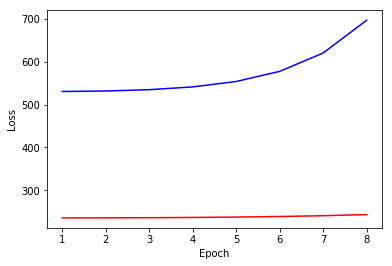

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(1,model.epoch+1),model.cost_list,'b-',range(1,model2.epoch+1),model2.cost_list,'r-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()